In [61]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,  plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# Load the experimental dataset (with "Class" column)
df_exp = pd.read_csv('../data/creditcard.csv')

# Drop duplicates
df_exp = df_exp.drop_duplicates()

# Normalizing the "Amount" column
scaler = StandardScaler()
df_exp["Normalized_Amount"] = scaler.fit_transform(df_exp["Amount"].values.reshape(-1, 1))

# Drop the original "Amount" column (optional)
df_exp = df_exp.drop(["Amount"], axis=1)

In [ ]:
# Fetching the target feature ("Class")
Y_exp = df_exp["Class"]

# Fetching the independent features (dropping "Class")
X_exp = df_exp.drop(["Class"], axis=1)

# Handle class imbalance using SMOTE
X_balance, Y_balance = SMOTE().fit_resample(X_exp, Y_exp)

# Split the experimental data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_balance, Y_balance, test_size=1/3, random_state=42)

# Initialize and train the decision tree classifier
dt_model_exp = DecisionTreeClassifier(random_state=42)
dt_model_exp.fit(X_train, Y_train)
print('Model trained.')

In [73]:
## ----
# Load my dummy dataset (without "Class" column)
df = pd.read_csv('../data/credit_card_fraud_data.csv')

# Drop duplicates
df = df.drop_duplicates()

# Normalizing the "Amount" column
df["Normalized_Amount"] = scaler.transform(df["Amount"].values.reshape(-1, 1))

df = df.drop(columns=['Amount'])

# Now predict the "Class" for your dataset using the trained model
predicted_class = dt_model_exp.predict(df)

# Adding the predicted "Class" as a new column to your dataset
df['Predicted_Class'] = predicted_class

# Display the first few rows to see the predicted results
df['Predicted_Class'].value_counts()

Predicted_Class
0    985
1     15
Name: count, dtype: int64

In [74]:
# Display only fraudulent transactions
fraudulent_transactions = df[df['Predicted_Class'] == 1]

# Display original values and predicted class
fraudulent_transactions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Normalized_Amount,Predicted_Class
74,75.0,-0.559261,0.495184,-0.648671,-1.253606,-2.784368,-0.259219,-1.942497,1.562141,0.377337,...,1.366394,-0.327910,-2.988808,0.288278,1.022680,0.907316,1.433392,-0.693379,0.683972,1
117,118.0,0.446730,2.593895,0.654898,1.772510,0.248291,-0.294784,-0.924498,3.000564,0.066696,...,-0.729202,0.918732,0.244562,0.206931,-2.237717,-0.728889,0.517450,3.177314,1.935121,1
345,346.0,-0.243972,-0.556091,-0.612509,-0.412342,-0.328138,-0.719666,-0.489200,1.214354,1.220449,...,-1.234337,0.216977,-0.346261,1.166909,0.461664,-0.479913,-0.675035,-2.079999,-0.173052,1
377,378.0,0.514196,1.016627,0.046680,1.185916,-0.035729,0.803323,0.316750,1.595423,-1.368384,...,-0.180684,-0.318345,-0.356727,-0.324511,-1.698474,0.403250,-0.802473,0.939647,0.104776,1
424,425.0,0.761928,-1.389597,-3.035331,4.769078,-7.505478,-17.461459,-14.457069,-20.745385,5.143970,...,-8.774819,-6.416434,-4.454641,-4.235658,-1.479128,-4.818260,5.055715,-6.936423,36.375946,1


In [75]:
# Simulate true labels based on some condition
# Assuming that any normalized amount above a certain threshold is fraudulent
threshold = 5.0  # Example threshold; adjust based on your logic
df['True_Class'] = (df['Normalized_Amount'] > threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(df['True_Class'], predicted_class)
precision = precision_score(df['True_Class'], predicted_class)
recall = recall_score(df['True_Class'], predicted_class)
f1 = f1_score(df['True_Class'], predicted_class)

# Print evaluation metrics
print("Accuracy: {:.5f}".format(accuracy))
print("Precision: {:.5f}".format(precision))
print("Recall: {:.5f}".format(recall))
print("F1-score: {:.5f}".format(f1))

Accuracy: 0.96800
Precision: 0.13333
Recall: 0.09524
F1-score: 0.11111


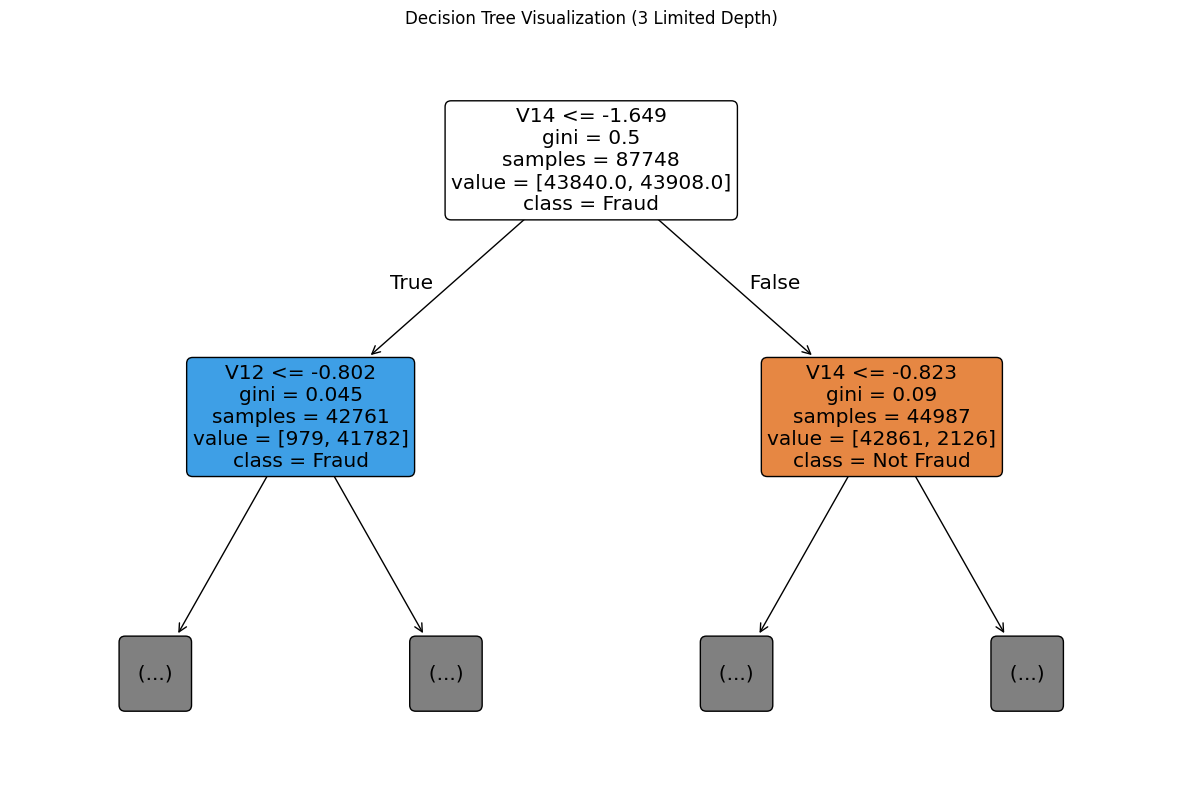

In [76]:
# Visualization of the Decision Tree with 3 limited depth

plt.figure(figsize=(15, 10))
plot_tree(dt_model_exp, 
          filled=True, 
          feature_names=X_exp.columns, 
          class_names=['Not Fraud', 'Fraud'], 
          rounded=True,
          max_depth=1)  # Limit the depth here
plt.title("Decision Tree Visualization (3 Limited Depth)")
plt.show()

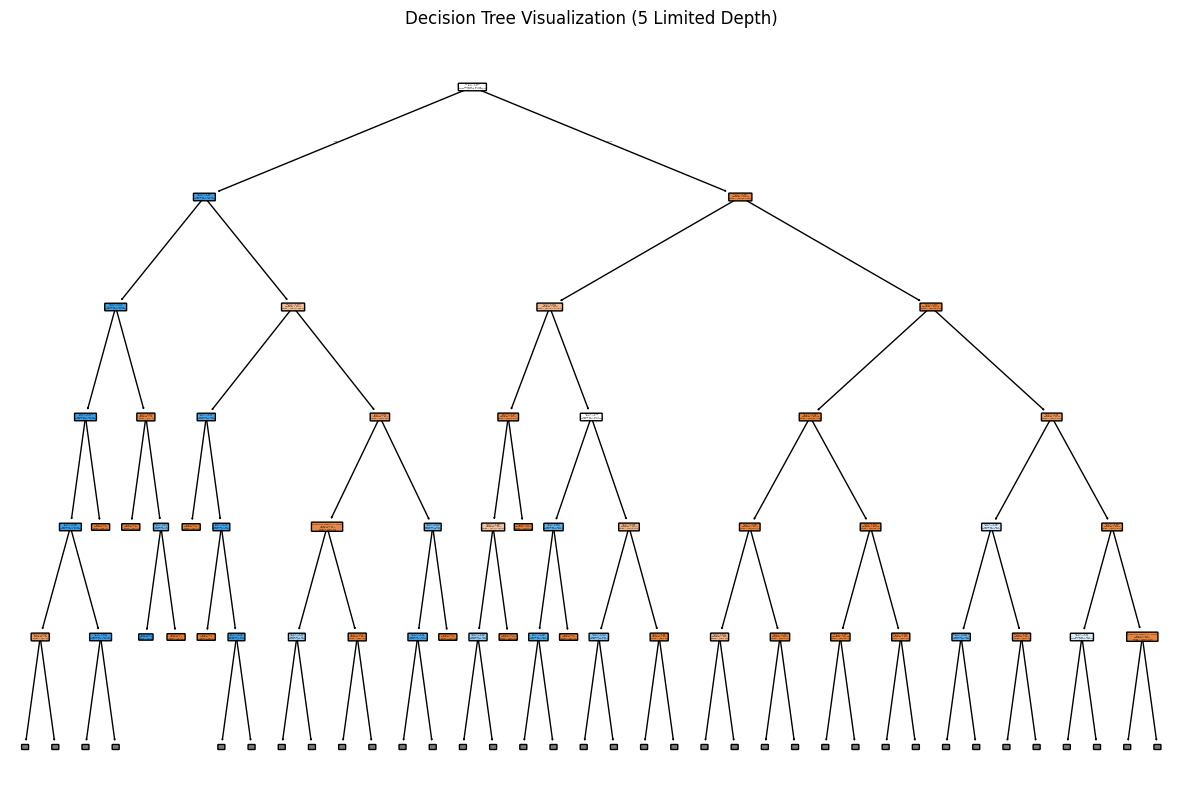

In [77]:
# Visualization of the Decision Tree with 5 limited depth

plt.figure(figsize=(15, 10))
plot_tree(dt_model_exp, 
          filled=True, 
          feature_names=X_exp.columns, 
          class_names=['Not Fraud', 'Fraud'], 
          rounded=True,
          max_depth=5)  # Limit the depth here
plt.title("Decision Tree Visualization (5 Limited Depth)")
plt.show()

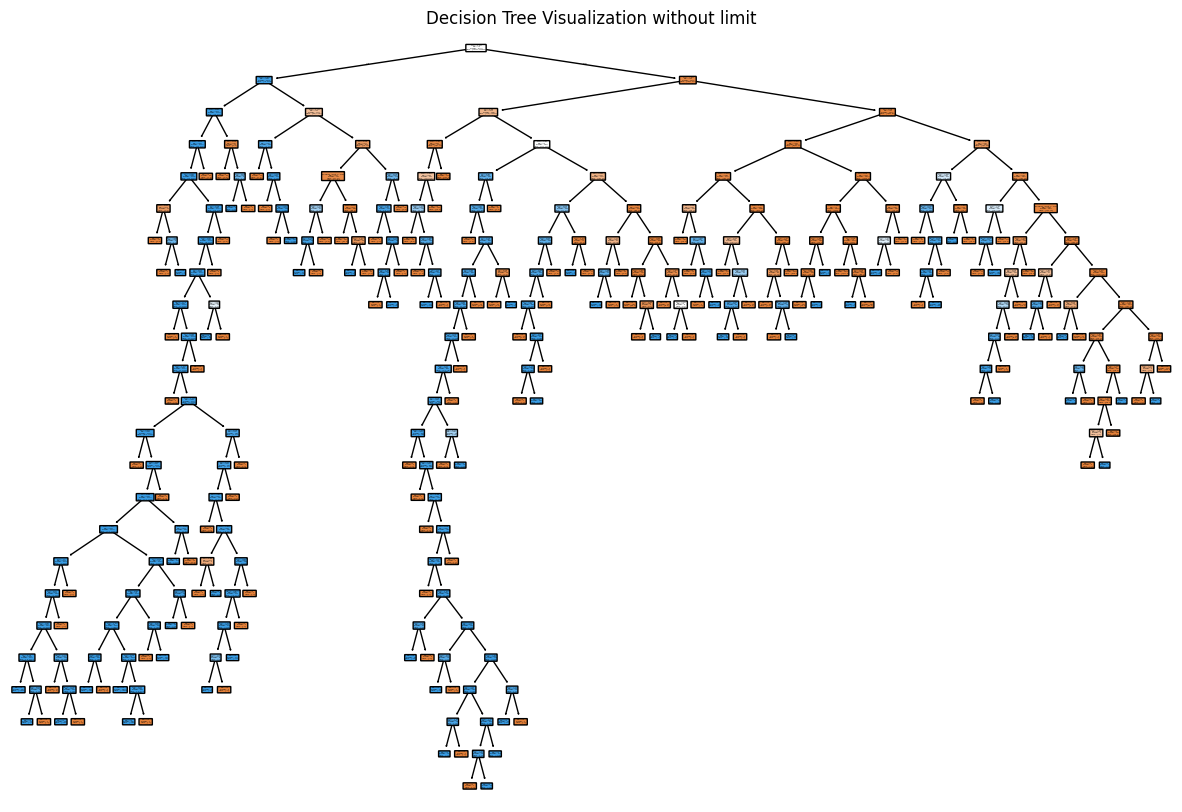

In [79]:
# Visualization of the Decision Tree with 5 limited depth

plt.figure(figsize=(15, 10))
plot_tree(dt_model_exp, 
          filled=True, 
          feature_names=X_exp.columns, 
          class_names=['Not Fraud', 'Fraud'], 
          rounded=True)
plt.title("Decision Tree Visualization without limit")
plt.show()